# <a id = "top">Premiere League Statistics Analysis</a>

In [1]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import missingno
import plotly

In [2]:
df  = pd.read_csv("pl_player_statistics.csv")

Get an initial overview of the data

In [3]:
df.head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [4]:
df.shape

(571, 59)

In [5]:
df.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

Filtering columns that are relevant for the current analysis

In [6]:
relevant_columns = ['Name', 'Club', 'Position', 'Nationality', 'Age', 'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match', 
        'Shots', 'Shots on target', 'Shooting accuracy %', 'Big chances missed', 'Clean sheets', 'Goals conceded', 'Tackles',
        'Tackle success %', 'Errors leading to goal', 'Assists', 'Passes', 'Passes per match', 'Big chances created', 'Saves', 
        'Penalties saved', 'Yellow cards', 'Red cards']

df = df.loc[:, relevant_columns]


In [7]:
df.head()

,Name,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,...,Tackle success %,Errors leading to goal,Assists,Passes,Passes per match,Big chances created,Saves,Penalties saved,Yellow cards,Red cards
0,Bernd Leno,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,NaN,...,NaN,7.0,0,1783,27.86,NaN,222.0,1.0,2,0
1,Matt Macey,Arsenal,Goalkeeper,England,26.0,0,0,0,0,NaN,...,NaN,0.0,0,0,0.00,NaN,0.0,0.0,0,0
2,Rúnar Alex Rúnarsson,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,NaN,...,NaN,0.0,0,0,0.00,NaN,0.0,0.0,0,0
3,Héctor Bellerín,Arsenal,Defender,Spain,25.0,160,90,37,7,NaN,...,78%,1.0,18,7125,44.53,28.0,NaN,NaN,23,0
4,Kieran Tierney,Arsenal,Defender,Scotland,23.0,16,7,5,1,NaN,...,81%,0.0,1,519,32.44,1.0,NaN,NaN,2,0


In [8]:
df.shape

(571, 27)

In [9]:
"""
Name: Name of the player
Club: Club the player plays for
Position: Position of the player
Nationality: Nationality of the player
Age: Age of the player
Appearances: Number of appearances (including substitute appearances)
Wins: Number of wins
Losses: Number of losses
Goals: Number of goals scored in the EPL
Goals per match: Average number of goals per match
Shots: Number of shots
Shots on target: Number of shots on target
Shooting accuracy %: Shooting accuracy in percentage
Big chances missed: Number of big chances missed
Clean sheets: Number of clean sheets
Goals conceded: Number of goals conceded
Tackles: Number of tackles
Tackle success %: Tackle success in percentage
Errors leading to goal: Number of errors that led to a goal
Assists: Number of assists
Passes: Number of passes
Passes per match: Average number of passes per match
Big chances created: Number of big chances created
Saves: Number of saves
Penalties saved: Number of penalties saved
Yellow cards: Number of yellow cards
Red cards: Number of red cards
"""

'\nName: Name of the player\nClub: Club the player plays for\nPosition: Position of the player\nNationality: Nationality of the player\nAge: Age of the player\nAppearances: Number of appearances (including substitute appearances)\nWins: Number of wins\nLosses: Number of losses\nGoals: Number of goals scored in the EPL\nGoals per match: Average number of goals per match\nShots: Number of shots\nShots on target: Number of shots on target\nShooting accuracy %: Shooting accuracy in percentage\nBig chances missed: Number of big chances missed\nClean sheets: Number of clean sheets\nGoals conceded: Number of goals conceded\nTackles: Number of tackles\nTackle success %: Tackle success in percentage\nErrors leading to goal: Number of errors that led to a goal\nAssists: Number of assists\nPasses: Number of passes\nPasses per match: Average number of passes per match\nBig chances created: Number of big chances created\nSaves: Number of saves\nPenalties saved: Number of penalties saved\nYellow car

In [10]:
df.dtypes

Name                       object
Club                       object
Position                   object
Nationality                object
Age                       float64
Appearances                 int64
Wins                        int64
Losses                      int64
Goals                       int64
Goals per match           float64
Shots                     float64
Shots on target           float64
Shooting accuracy %        object
Big chances missed        float64
Clean sheets              float64
Goals conceded            float64
Tackles                   float64
Tackle success %           object
Errors leading to goal    float64
Assists                     int64
Passes                      int64
Passes per match          float64
Big chances created       float64
Saves                     float64
Penalties saved           float64
Yellow cards                int64
Red cards                   int64
dtype: object

Some data cleaning comes below

In [11]:
df['Shooting accuracy %'] = df['Shooting accuracy %'].str.rstrip('%').astype(float)
df['Shooting accuracy %'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Shooting accuracy %, dtype: float64

In [12]:
df['Tackle success %'] = df['Tackle success %'].str.rstrip('%').astype(float)
df['Tackle success %'].head()

0     NaN
1     NaN
2     NaN
3    78.0
4    81.0
Name: Tackle success %, dtype: float64

In [13]:
df.dtypes

Name                       object
Club                       object
Position                   object
Nationality                object
Age                       float64
Appearances                 int64
Wins                        int64
Losses                      int64
Goals                       int64
Goals per match           float64
Shots                     float64
Shots on target           float64
Shooting accuracy %       float64
Big chances missed        float64
Clean sheets              float64
Goals conceded            float64
Tackles                   float64
Tackle success %          float64
Errors leading to goal    float64
Assists                     int64
Passes                      int64
Passes per match          float64
Big chances created       float64
Saves                     float64
Penalties saved           float64
Yellow cards                int64
Red cards                   int64
dtype: object

In [14]:
df.isnull().sum()

# many of the missing values are due to the fact that certain statistics are not relevant for certain positions.

Name                        0
Club                        0
Position                    0
Nationality                 1
Age                         1
Appearances                 0
Wins                        0
Losses                      0
Goals                       0
Goals per match           262
Shots                     262
Shots on target           262
Shooting accuracy %       262
Big chances missed        262
Clean sheets              309
Goals conceded            309
Tackles                    69
Tackle success %          181
Errors leading to goal    112
Assists                     0
Passes                      0
Passes per match            0
Big chances created        69
Saves                     502
Penalties saved           502
Yellow cards                0
Red cards                   0
dtype: int64

Remove players with no age and nationality information

In [15]:
df = df.dropna(subset=['Age', 'Nationality'])

In [16]:
# get number of players with 0 appearances
num_players_zero_appearances = df[df['Appearances'] == 0].shape[0]
num_players_zero_appearances


90

Remove players with 0 appearances

In [17]:
df = df[df['Appearances'] != 0]
df.shape

(480, 27)

Check for duplicates

In [18]:
{x:df[x].duplicated().sum() for x in df}

# the only column where having duplicates would be an issue is the Name column.

{'Name': 0,
 'Club': 460,
 'Position': 476,
 'Nationality': 424,
 'Age': 458,
 'Appearances': 283,
 'Wins': 361,
 'Losses': 379,
 'Goals': 425,
 'Goals per match': 409,
 'Shots': 326,
 'Shots on target': 374,
 'Shooting accuracy %': 429,
 'Big chances missed': 431,
 'Clean sheets': 414,
 'Goals conceded': 359,
 'Tackles': 266,
 'Tackle success %': 425,
 'Errors leading to goal': 463,
 'Assists': 437,
 'Passes': 32,
 'Passes per match': 38,
 'Big chances created': 425,
 'Saves': 435,
 'Penalties saved': 471,
 'Yellow cards': 431,
 'Red cards': 474}

In [19]:
num_cols = df.dtypes[df.dtypes!="O"].index.tolist()

In [20]:
num_cols

['Age',
 'Appearances',
 'Wins',
 'Losses',
 'Goals',
 'Goals per match',
 'Shots',
 'Shots on target',
 'Shooting accuracy %',
 'Big chances missed',
 'Clean sheets',
 'Goals conceded',
 'Tackles',
 'Tackle success %',
 'Errors leading to goal',
 'Assists',
 'Passes',
 'Passes per match',
 'Big chances created',
 'Saves',
 'Penalties saved',
 'Yellow cards',
 'Red cards']

In [21]:
df[num_cols]

,Age,Appearances,Wins,Losses,Goals,Goals per match,Shots,Shots on target,Shooting accuracy %,Big chances missed,...,Tackle success %,Errors leading to goal,Assists,Passes,Passes per match,Big chances created,Saves,Penalties saved,Yellow cards,Red cards
0,28.0,64,28,16,0,NaN,NaN,NaN,NaN,NaN,...,NaN,7.0,0,1783,27.86,NaN,222.0,1.0,2,0
3,25.0,160,90,37,7,NaN,NaN,NaN,NaN,NaN,...,78.0,1.0,18,7125,44.53,28.0,NaN,NaN,23,0
4,23.0,16,7,5,1,NaN,NaN,NaN,NaN,NaN,...,81.0,0.0,1,519,32.44,1.0,NaN,NaN,2,0
6,32.0,44,21,11,3,NaN,NaN,NaN,NaN,NaN,...,61.0,1.0,2,2416,54.91,4.0,NaN,NaN,18,0
7,25.0,41,25,9,0,NaN,NaN,NaN,NaN,NaN,...,70.0,0.0,0,2200,53.66,0.0,NaN,NaN,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,20.0,1,1,0,0,1.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0,5,5.00,0.0,NaN,NaN,0,0
566,20.0,31,14,7,3,0.10,19.0,6.0,32.0,3.0,...,NaN,NaN,4,399,12.87,5.0,NaN,NaN,3,0
567,29.0,78,32,23,32,0.41,237.0,82.0,35.0,20.0,...,NaN,NaN,13,2108,27.03,26.0,NaN,NaN,7,0
568,24.0,105,27,47,5,0.05,78.0,21.0,27.0,6.0,...,NaN,NaN,12,1434,13.66,13.0,NaN,NaN,4,0


Start visualizing the data by exploring the distribution behind some of the numerical columns

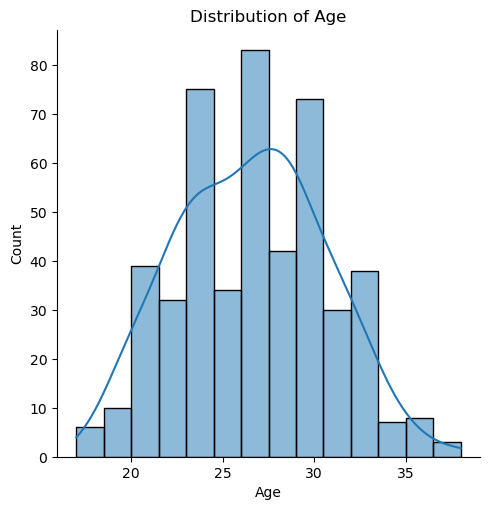

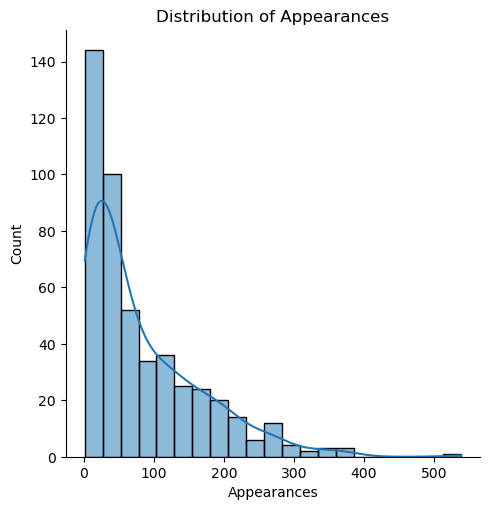

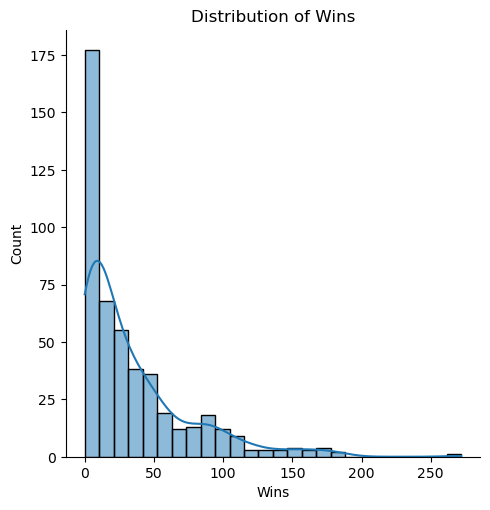

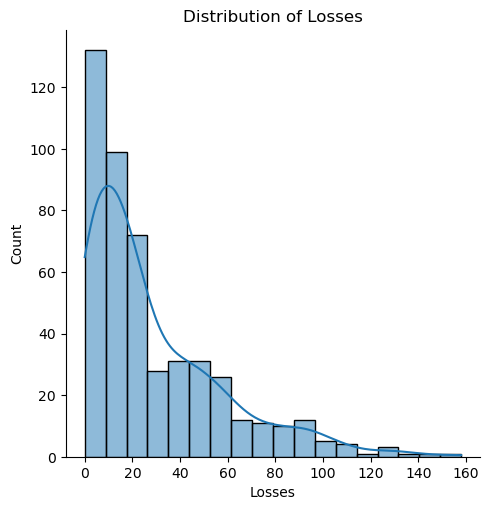

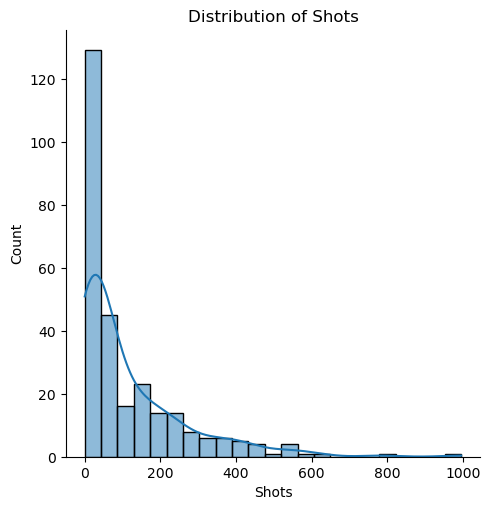

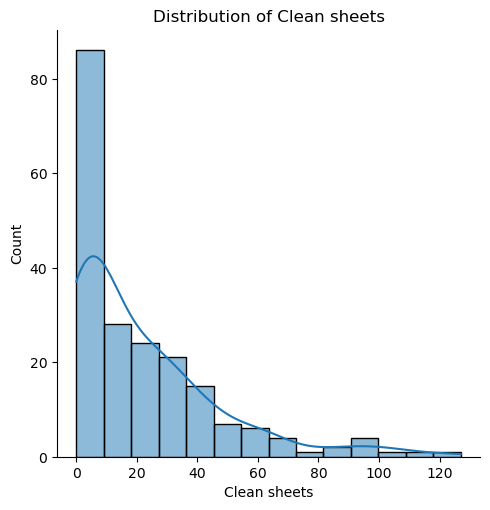

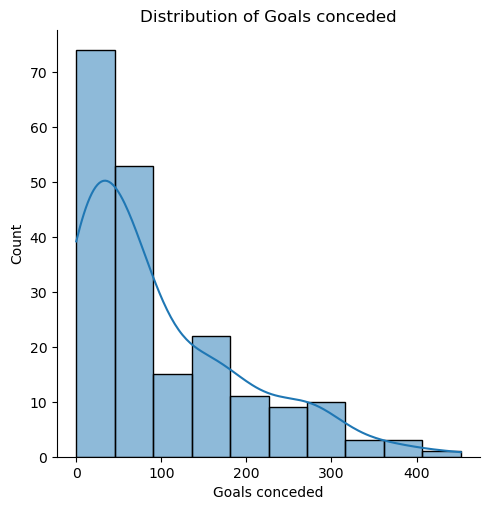

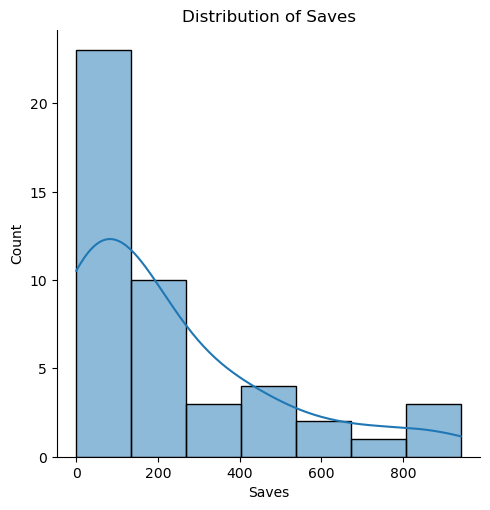

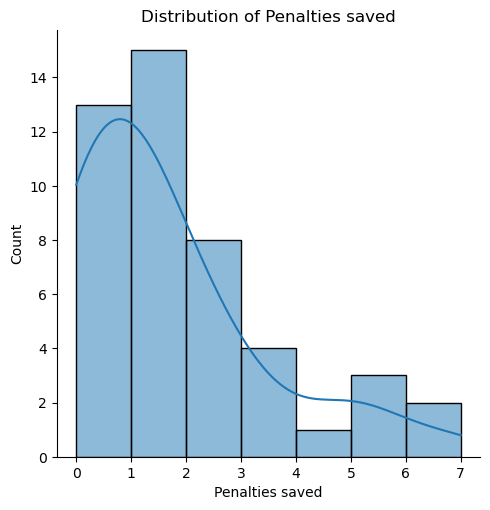

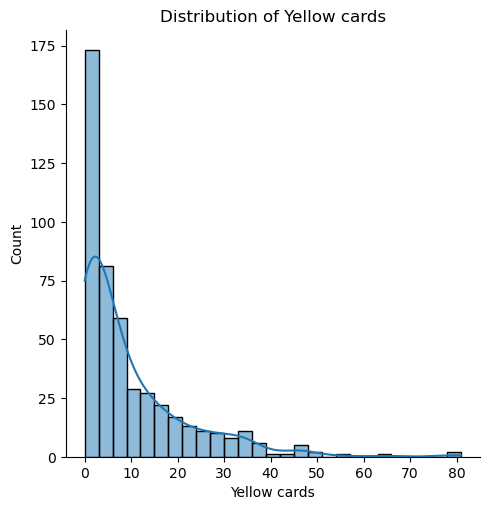

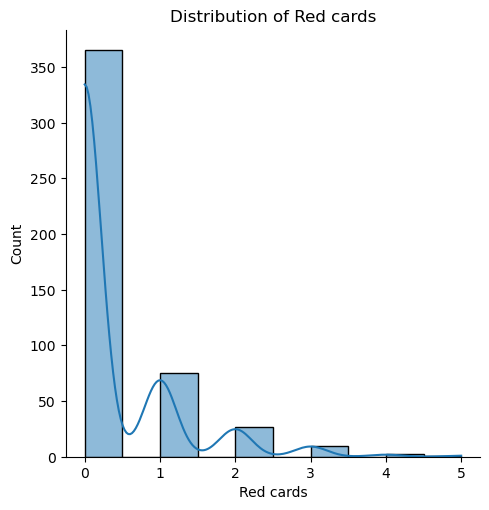

In [22]:
for num_col in ['Age', 'Appearances', 'Wins', 'Losses', 'Shots', 'Clean sheets', 
'Goals conceded', 'Saves', 'Penalties saved', 'Yellow cards', 'Red cards']:
    sns.displot(df[num_col], kde=True)
    plt.title(f'Distribution of {num_col}')
    plt.show()

Most of the plots are quite self-explanatory, but there is lots of information that is not available in the plots. For example, let's check who is that one player with number of appearances higher than 500.

In [23]:
player_high_appearances = df[df['Appearances'] > 500]['Name'].values
print(player_high_appearances)


['James Milner']


As we guessed from the plot, it was just one player having such statistics and it is James Milner. Now let us check if he is also the one that has the highest number of wins.

In [24]:
player_high_goals = df[df['Wins'] > 250]['Name'].values
print(player_high_goals)


['James Milner']


Impressive! Now let us look at his contenders. Here are players having the most appearances in the Premier League.

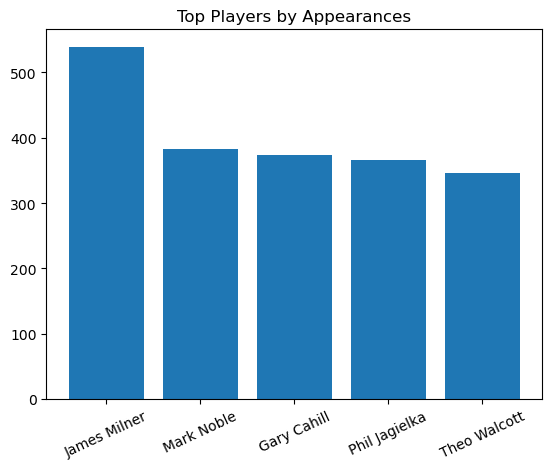

In [25]:
df_sorted_app = df.sort_values(by="Appearances", ascending=False)
plt.bar(df_sorted_app["Name"].head(), df_sorted_app["Appearances"].head())
plt.title("Top Players by Appearances")
plt.xticks(rotation=25);

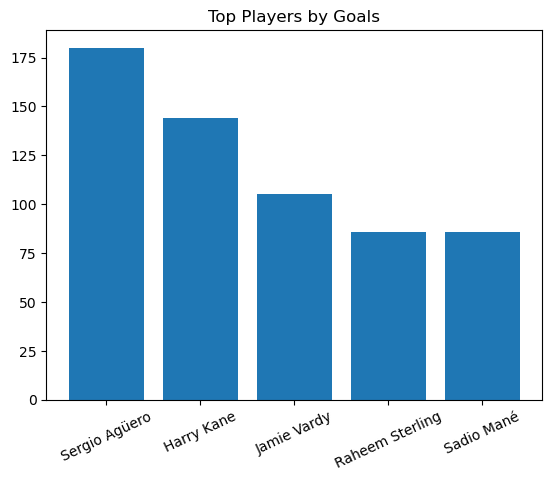

In [26]:
df_sorted_goals = df.sort_values(by="Goals", ascending=False)
plt.bar(df_sorted_goals["Name"].head(), df_sorted_goals["Goals"].head())
plt.title("Top Players by Goals")
plt.xticks(rotation=25);

But what if some players were included in the previous results just because of having spent a looong time in the EPL? Let us look at the players with highest number of goal/appearances ratio to overcome this potential bias!

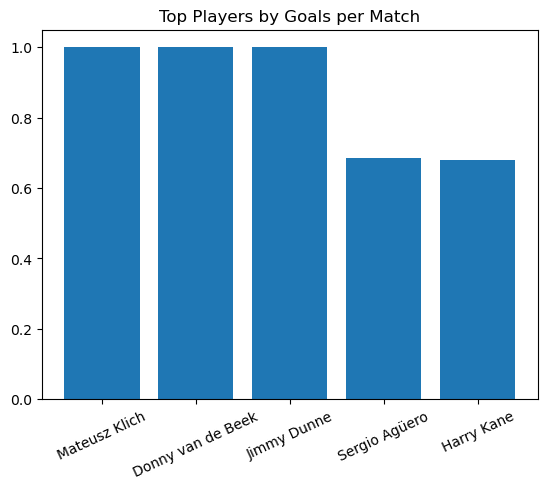

In [27]:
df['Goals per match'] = df['Goals'] / df['Appearances']
df_sorted_goals_per_match = df.sort_values(by="Goals per match", ascending=False)

fig, ax = plt.subplots()
ax.bar(df_sorted_goals_per_match['Name'].head(), df_sorted_goals_per_match['Goals per match'].head())
plt.xticks(rotation=25)
plt.title("Top Players by Goals per Match")
plt.show()

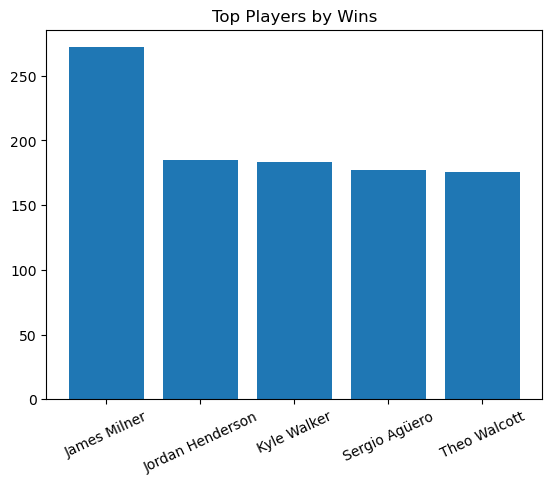

In [28]:
df_sorted_saves = df.sort_values(by="Wins", ascending=False)
plt.bar(df_sorted_saves["Name"].head(), df_sorted_saves["Wins"].head())
plt.title("Top Players by Wins")
plt.xticks(rotation=25);

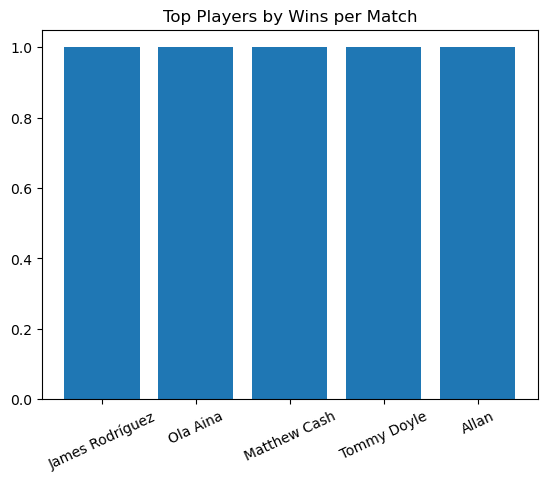

In [29]:
df['Wins per match'] = df['Wins'] / df['Appearances']
df_sorted_wins_per_match = df.sort_values(by="Wins per match", ascending=False)
plt.bar(df_sorted_wins_per_match["Name"].head(), df_sorted_wins_per_match["Wins per match"].head())
plt.title("Top Players by Wins per Match")
plt.xticks(rotation=25);

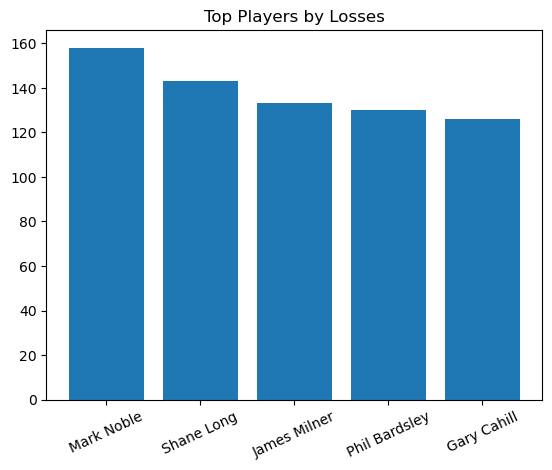

In [30]:
df_sorted_saves = df.sort_values(by="Losses", ascending=False)
plt.bar(df_sorted_saves["Name"].head(), df_sorted_saves["Losses"].head())
plt.title("Top Players by Losses")
plt.xticks(rotation=25);

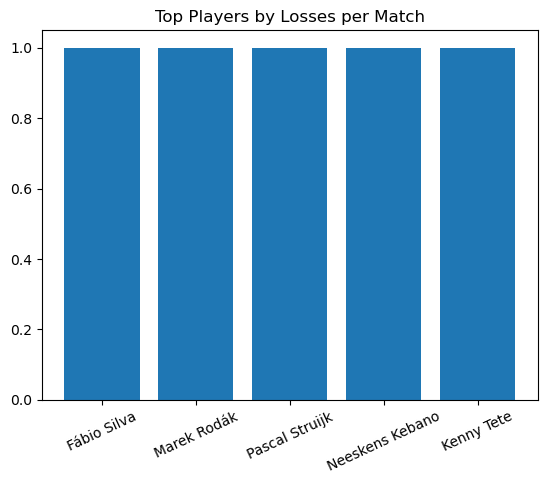

In [31]:
df['Losses per match'] = df['Losses'] / df['Appearances']
df_sorted_losses_per_match = df.sort_values(by="Losses per match", ascending=False)
plt.bar(df_sorted_losses_per_match["Name"].head(), df_sorted_losses_per_match["Losses per match"].head())
plt.title("Top Players by Losses per Match")
plt.xticks(rotation=25);

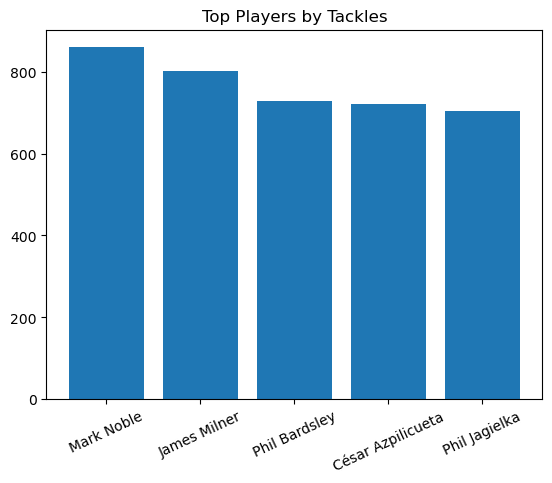

In [32]:
df_sorted_tackles = df.sort_values(by="Tackles", ascending=False)
plt.bar(df_sorted_tackles["Name"].head(), df_sorted_tackles["Tackles"].head())
plt.title("Top Players by Tackles")
plt.xticks(rotation=25);

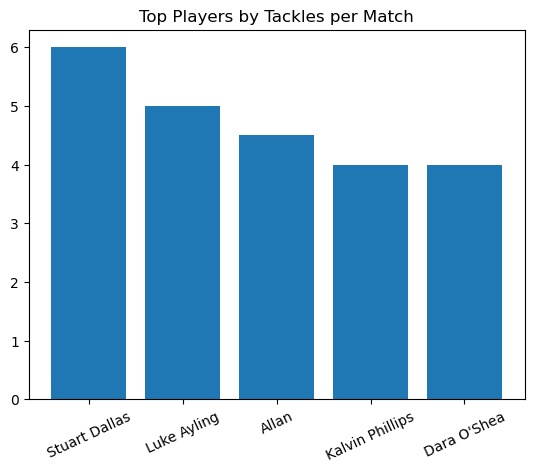

In [33]:
df['Tackles per match'] = df['Tackles'] / df['Appearances']
df_sorted_tackles_per_match = df.sort_values(by="Tackles per match", ascending=False)
plt.bar(df_sorted_tackles_per_match["Name"].head(), df_sorted_tackles_per_match["Tackles per match"].head())
plt.title("Top Players by Tackles per Match")
plt.xticks(rotation=25);

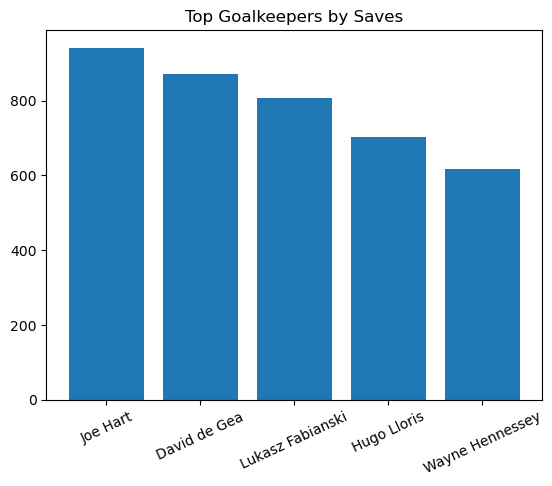

In [34]:
df_sorted_saves = df.sort_values(by="Saves", ascending=False)
plt.bar(df_sorted_saves["Name"].head(), df_sorted_saves["Saves"].head())
plt.title("Top Goalkeepers by Saves")
plt.xticks(rotation=25);

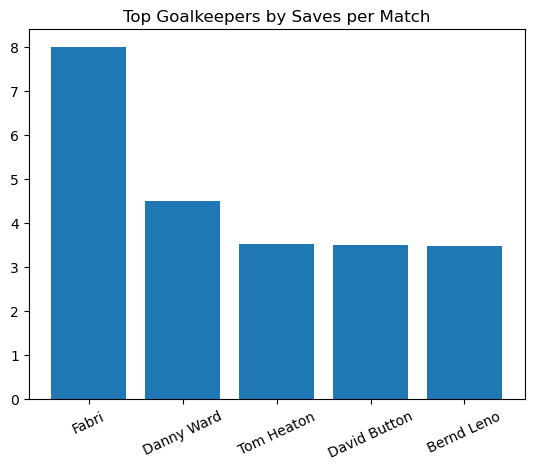

In [35]:
df['Saves per match'] = df['Saves'] / df['Appearances']
df_sorted_saves_per_match = df.sort_values(by="Saves per match", ascending=False)
plt.bar(df_sorted_saves_per_match["Name"].head(), df_sorted_saves_per_match["Saves per match"].head())
plt.title("Top Goalkeepers by Saves per Match")
plt.xticks(rotation=25);

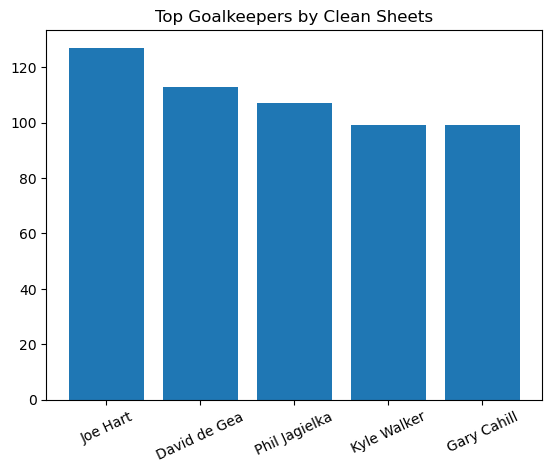

In [36]:
df_sorted_clean_sheets = df.sort_values(by="Clean sheets", ascending=False)
plt.bar(df_sorted_clean_sheets['Name'].head(), df_sorted_clean_sheets['Clean sheets'].head())
plt.title("Top Goalkeepers by Clean Sheets")
plt.xticks(rotation=25);


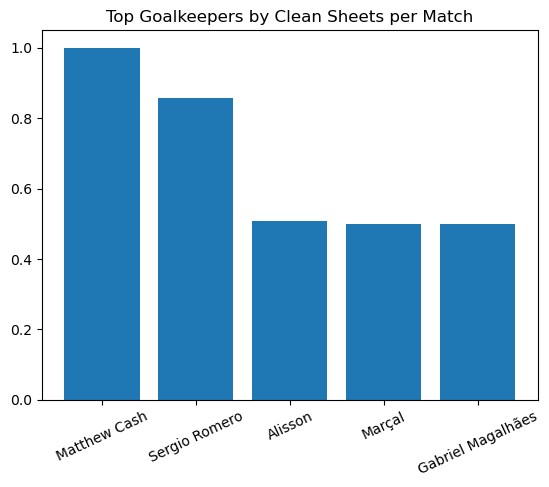

In [37]:
df['Clean sheets per match'] = df['Clean sheets'] / df['Appearances']
df_sorted_clean_sheets_per_match = df.sort_values(by="Clean sheets per match", ascending=False)
plt.bar(df_sorted_clean_sheets_per_match["Name"].head(), df_sorted_clean_sheets_per_match["Clean sheets per match"].head())
plt.title("Top Goalkeepers by Clean Sheets per Match")
plt.xticks(rotation=25);

Now let's bring everything into one picture.

In [38]:
df_sorted_saves = df.sort_values(by='Saves', ascending=False).head(10)
df_sorted_saves_per_match = df.sort_values(by='Saves per match', ascending=False).head(10)
df_sorted_clean_sheets = df.sort_values(by='Clean sheets', ascending=False).head(10)
df_sorted_clean_sheets_per_match = df.sort_values(by='Clean sheets per match', ascending=False).head(10)

fig = make_subplots(rows=2, cols=2, subplot_titles=("Number of Saves", "Saves per Match", "Clean Sheets", "Clean Sheets per Match"), vertical_spacing=0.2)

fig.add_trace(go.Bar(x=df_sorted_saves['Name'], y=df_sorted_saves['Saves'], name='Number of Saves'), row=1, col=1)
fig.add_trace(go.Bar(x=df_sorted_saves_per_match['Name'], y=df_sorted_saves_per_match['Saves per match'], name='Saves per Match'), row=1, col=2)
fig.add_trace(go.Bar(x=df_sorted_clean_sheets['Name'], y=df_sorted_clean_sheets['Clean sheets'], name='Clean Sheets'), row=2, col=1)
fig.add_trace(go.Bar(x=df_sorted_clean_sheets_per_match['Name'], y=df_sorted_clean_sheets_per_match['Clean sheets per match'], name='Clean Sheets per Match'), row=2, col=2)

fig.update_layout(height=1000, width=1300, title_text="Top 10 Goalkeepers Statistics")
fig.show()


It is interesting to check the correlation between the number of saves and the number of clean sheets.

In [39]:
goalkeepers_df = df[df['Position'] == 'Goalkeeper']

fig = go.Figure(data=go.Scatter(
    x=goalkeepers_df['Saves'],
    y=goalkeepers_df['Clean sheets'],
    mode='markers',
    marker=dict(
        size=8,
        color='blue',
        opacity=0.7
    ),
    text=goalkeepers_df['Name'],
    hovertemplate=
    '<b>%{text}</b><br>' +
    'Saves: %{x}<br>' +
    'Clean Sheets: %{y}<br>'
))

fig.update_layout(
    title='Number of Saves vs Number of Clean Sheets for Goalkeepers',
    xaxis_title='Number of Saves',
    yaxis_title='Number of Clean Sheets',
    showlegend=False
)

fig.show()


As expected, there's a positive linear relationship between this features.

Now let us look at the most represented nations

In [40]:
top_nationalities = df['Nationality'].value_counts().head(10).index.tolist()
top_nationalities

['England',
 'France',
 'Spain',
 'Brazil',
 'Ireland',
 'Portugal',
 'Scotland',
 'Argentina',
 'Netherlands',
 'Wales']

In [41]:
fig = go.Figure(data=go.Bar(
    x=df['Nationality'].value_counts().head(10).index,
    y=df['Nationality'].value_counts().head(10).values
))

fig.update_layout(
    title='Top 10 Nationalities',
    xaxis_title='Nationality',
    yaxis_title='Count'
)

fig.show()


Most represented clubs

In [42]:
top_clubs = df['Club'].value_counts().head(10).index.tolist()

In [43]:
top_clubs

['Manchester-United',
 'Everton',
 'Leicester-City',
 'Liverpool',
 'Newcastle-United',
 'Arsenal',
 'Aston-Villa',
 'Crystal-Palace',
 'Tottenham-Hotspur',
 'Chelsea']

In [44]:
fig = go.Figure(data=go.Bar(
    x=df['Club'].value_counts().head(10).index,
    y=df['Club'].value_counts().head(10).values
))

fig.update_layout(
    title='Top 10 Clubs',
    xaxis_title='Club',
    yaxis_title='Count'
)

fig.show()

In [46]:
trace_goals = go.Bar(
    x=df['Club'],
    y=df['Goals'],
    name='Goals'
)

trace_assists = go.Bar(
    x=df['Club'],
    y=df['Yellow cards'],
    name='Yellow cards'
)

trace_wins = go.Bar(
    x=df['Club'],
    y=df['Wins'],
    name='Wins'
)

data = [trace_goals, trace_assists, trace_wins]

layout = go.Layout(
    barmode='stack',
    title='Distribution of Goals, Yellow cards, and Wins for Each Club',
    xaxis=dict(title='Club'),
    yaxis=dict(title='Count')
)

fig = go.Figure(data=data, layout=layout)
fig.show()


Now let us check how the distribution of ages compares between different playing positions.

In [47]:
fig = go.Figure(data=go.Box(
    x=df['Position'],
    y=df['Age'],
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8,
    marker=dict(
        color='rgb(7,40,89)'
    ),
    line=dict(
        color='rgb(7,40,89)'
    ),
    fillcolor='rgba(0,0,0,0.1)',
    opacity=0.7
))

fig.update_layout(
    title='Age Distribution by Position',
    xaxis_title='Position',
    yaxis_title='Age'
)

fig.show()


As we could expect, goalkeepers include the oldest players :) Let us also check the 10 youngest players of the league.

In [48]:
df_sorted_age = df.sort_values(by="Age", ascending=True)
fig = px.bar(df_sorted_age.head(10), x='Name', y='Age')
fig.show()

In [49]:
fig = go.Figure(data=go.Box(
    x=df['Club'],
    y=df['Age'],
    boxpoints='all',
    jitter=0.3,
    pointpos=-1.8,
    marker=dict(
        color='rgb(7,40,89)'
    ),
    line=dict(
        color='rgb(7,40,89)'
    ),
    fillcolor='rgba(0,0,0,0.1)',
    opacity=0.7
))

fig.update_layout(
    title='Age Distribution by Club',
    xaxis_title='Club',
    yaxis_title='Age'
)

fig.show()

